# The generalized (Extreme Studentized Deviate) ESD test

## __<font color=blue>Purpose</font>__
---

The generalized ESD test detects __one or more outliers__ in a dataset that is assumed to be __normally distributed__.

You must specify the __maximum number of outliers, _r___, to test for.

## __<font color=blue>How it works</font>__
---

The generalized ESD test essentially performs _r_ separate tests: a test for one outlier, a test for two outliers, and so on until _r_ outliers.

First, a __null hypothesis ($H_{0}$)__ is defined. In this case, H₀ assumes that there are no outliers in the dataset. The __alternative hypothesis ($H_{a}$)__ is that there are up to _r_ outliers in the dataset.

Next, for each step, we calculate the __generalized ESD test statistic, $R_{i}$__

$$
 R_{i} = \frac{max_{i}|x_{i}-\overline{x}|}{s}
$$

with _$\overline{x}$_ and _s_ denoting the sample mean and standard deviation, respectively.

Remove the observation that maximizes $|x_{i}-\overline{x}|$ and then recompute the above statistic with _n - 1_ observations.

Repeat this process until _r_ observations have been removed. This results in the ___r_ test statistics $R_{1}$, $R_{2}$, ..., $R_{r}$__.

At the same time, compute the following corresponding __critical values__

$$
 \lambda_{i} = \frac{(n - i) t_{p,n-i-1}}{\sqrt{(n - i - 1 + t_{p,n-i-1}^2)(n - i + 1)}}
$$
 
where $t_{p,\nu}$ is the critical value from the _t_ distribution with $\nu$ degrees of freedom and

$$
 p = 1 - \frac{\alpha}{2 (n - i + 1)}
$$
 
The number of outliers is determined by finding the largest _i_ such that $R_{i}$ > $\lambda_{i}$.

## __<font color=blue>Example</font>__
---

In [4]:
# Import the libraries needed

import matplotlib.pyplot as plt   # For creating visualizations and plots
import numpy as np                # For numerical computations and handling arrays
import scipy.stats as stats       # For statistical functions and probability distributions
import pandas as pd               # For working with dataframes

In [5]:
# Define an example dataset 

# Create a 1D NumPy array with some sample values (our dataset)
y = np.array([145, 125, 190, 135, 220, 130, 210, 3, 165, 165, 150, 350, 170, 180, 195, 440, 215, 135, 410, 40, 140, 175])

# Create an array with evenly spaced numbers within a given interval (0, 1, 2, ...) to use as the x-axis
# Use np.arange(start (optional, default = 0), stop = len(y), step (optional, default = 1))
x = np.arange(len(y))

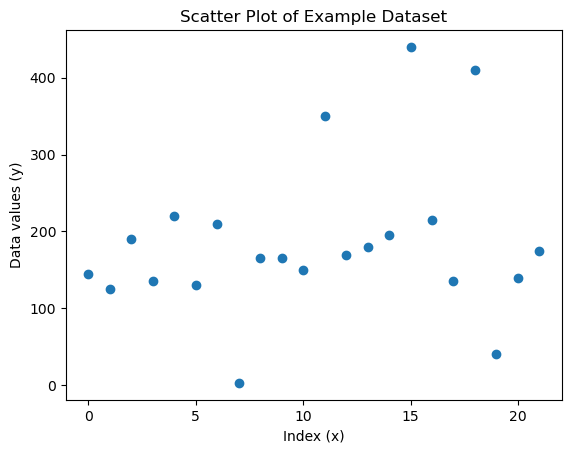

In [6]:
# Visualize the dataset

# Create a scatter plot of the data using x = indices (0, 1, 2, ...) and y = dataset values
plt.scatter(x,y)

# Add labels to the x-axis and y-axis
plt.xlabel("Index (x)")         # Describes what x-values represent
plt.ylabel("Data values (y)")   # Describes what y-values represent

# Add a title to the plot
plt.title("Scatter Plot of Example Dataset")

# Display the plot
plt.show()

Most values are very close together (between 0.199 and 0.203). We have 3, 40, 350, 410, and 440 as potential outliers. Let's apply a generalized ESD test.

- Null hypothesis ($H_{0}$): there are no outliers in the data
- Alternative hypothesis ($H_{a}$): there are up to 6 outliers in the data

In [8]:
# Define a function with loop to iterate over maximum number of outliers

def generalized_esd_test(data, max_outliers, alpha):
    """
    Perform the Generalized ESD test for detecting multiple outliers in a dataset.
    
    Parameters:
    data (list or np.array): input numerical data
    max_outliers (int): maximum number of outliers to test for
    alpha (float): significance level (commonly 0.05 for 5%)
    
    Returns:
    dictionary (dict) containing
        - outlier_indices: list of indices of detected outliers
        - outliers: list of outlier values
        - test_statistics: list of calculated test statistics R for each iteration
        - critical_values: list of calculated critical values λ for each iteration
    """
    # Convert data to numpy array for easier manipulation
    data = np.array(data)

    # Determine the length of the dataset
    n = len(data)
    
    # Lists to store data
    outlier_indices = []
    outliers = []
    test_statistics = []
    critical_values = []
    
    # Copy of the data to modify iteratively
    data_copy = data.copy()

    # Loop and compute and compare test statistic R and critical value λ
    for i in range(1, max_outliers + 1):

        # Calculate test statistic R for this iteration
        mean = np.mean(data_copy)             # Mean of the dataset
        std = np.std(data_copy, ddof=1)       # Sample standard deviation
        abs_diff = np.abs(data_copy - mean)   # Absolute differences of each dataset value from the mean
        max_abs_diff = np.max(abs_diff)       # Largest absolute difference from the mean
        R = max_abs_diff / std                # Largest deviation divided by sample standard deviation, test statistic R
        
        # Select the dataset value to remove
        max_index = np.argmax(abs_diff)                               # Maximum absolute difference from the mean
        actual_index = np.where(data == data_copy[max_index])[0][0]   # Calculate the index of the maximum absolute difference in the original data
        
        # Compute critical value λ for this iteration
        p = 1 - alpha / (2 * (n - i + 1))     # Define p
        t = stats.t.ppf(p, n - i - 1)         # Critical value for two-tailed test
        lambda_crit = ((n - i) * t) / (np.sqrt((n - i - 1 + t**2) * (n - i + 1)))   # Formula for critical value λ

        # Store values for inspection
        outlier_indices.append(actual_index)
        outliers.append(data_copy[max_index])
        test_statistics.append(R)
        critical_values.append(lambda_crit)
    
        # Remove the detected outlier from the copy of data for the next iteration
        data_copy = np.delete(data_copy, max_index)

    # Build DataFrame for all iterations
    df = pd.DataFrame({
        "Iteration": range(1, len(test_statistics) + 1),
        "Index": outlier_indices,
        "Value": outliers,
        "Test Statistic (R)": test_statistics,
        "Critical Value (λ)": critical_values
    })

    # Add decision column: Was the suspected outlier flagged?
    df["R > λ ?"] = df["Test Statistic (R)"] > df["Critical Value (λ)"]

    return df

In [9]:
# Example usage of function

result = generalized_esd_test(y, 6, 0.05)
print(result)

   Iteration  Index  Value  Test Statistic (R)  Critical Value (λ)  R > λ ?
0          1     15    440            2.497556            2.757735    False
1          2     18    410            2.729992            2.733780    False
2          3     11    350            2.714963            2.708246     True
3          4      7      3            2.721414            2.680931     True
4          5     19     40            2.838520            2.651599     True
5          6      4    220            1.707766            2.619964    False


In this example, the largest number of outliers for which the test statistic is greater than the critical value (at the 5 % level) is five.  We can conclude that there are five outliers in this dataset.

## __<font color=blue>Resources</font>__
---

- Rosner, B. (1983). Percentage Points for a Generalized ESD Many-Outlier Procedure. Technometrics, 25(2), 165–172. Available [here](https://doi.org/10.1080/00401706.1983.10487848).
- National Institute of Standards and Technology (NIST), Generalized ESD Test for Outliers. Available [here](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h3.htm).